In [ ]:
# !pip install opencv-python


In [ ]:
!pip install request

In [1]:
#!/usr/bin/python
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.io
import glob
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
from math import sqrt
import time
from PIL import Image

mypath = 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/images_Landmass.mat'
# mypath = 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/images_Landmass.mat'


# Test
# dirs = os.listdir( mypath )
# This would print all the files and directories
# for file in dirs:
#     print file name
#     print(file)
#     print file path
#     print(join(mypath, file))


Shape of data array:  (2000, 99, 99)


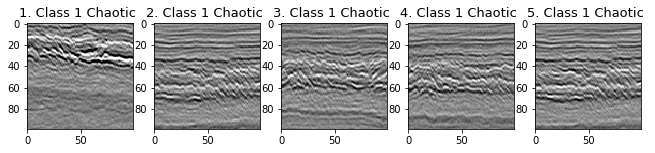

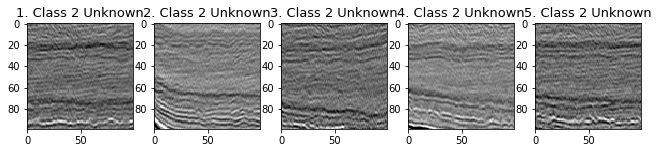

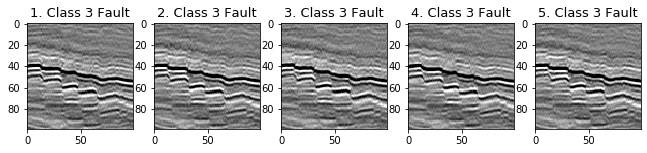

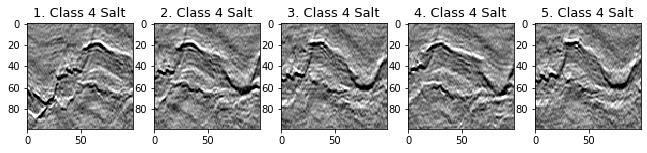

There are 2000 texture images. Each image has dimension:  (99, 99)


In [2]:
list_data = scipy.io.loadmat(mypath)['images']
# print(len(list_data))
array_data = np.array(list_data)
print('Shape of data array: ', array_data.shape)

fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+500], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1000], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1500], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
plt.show()
print('There are', len(array_data), 'texture images. Each image has dimension: ', array_data[0].shape)


In [3]:
for n in np.arange(500):
    mask_c = array_data[n]
    mask_o = array_data[n+500]
    mask_f = array_data[n+1000]
    mask_s = array_data[n+1500]
    rescaled1 = (255.0 / mask_c.max() * (mask_c - mask_c.min())).astype(np.uint8)
    rescaled2 = (255.0 / mask_o.max() * (mask_o - mask_o.min())).astype(np.uint8)
    rescaled3 = (255.0 / mask_f.max() * (mask_f - mask_f.min())).astype(np.uint8)
    rescaled4 = (255.0 / mask_s.max() * (mask_s - mask_s.min())).astype(np.uint8)
    im1 = Image.fromarray(rescaled1)
    im2 = Image.fromarray(rescaled2)
    im3 = Image.fromarray(rescaled3)
    im4 = Image.fromarray(rescaled4)
    im1.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/png/chaotic/%ichaotic.png'
             %(n+1))
    im2.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/png/unknown/%iother.png'
             %(n+1))
    im3.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/png/fault/%ifault.png'
             %(n+1))
    im4.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/png/salt/%isalt.png'
             %(n+1))
# 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/png/chaotic'

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.decomposition import NMF

In [5]:
NumOfClasses = 4
# M is total num of images
numImages = array_data.shape[0]
print(numImages)
# Same number of images per class
numImagesPerClass = int(numImages/NumOfClasses) 
print(type(numImagesPerClass))
X = np.reshape(array_data,(numImages,array_data.shape[1]*array_data.shape[2])).T
print('Data matrix X shape: ', X.shape)
# Check if there is negative element in the matrix. The dataset should be normalised to [0, 1]
if (X < 0).any():
    print('Matrix elements are not all positive!')

2000
<class 'int'>
Data matrix X shape:  (9801, 2000)


In [6]:
## Reference: https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/
#  choose the optimum value of ‘k’ using elbow method
# split features based on classes
# =====================================================================
X_ch = X[:,:numImagesPerClass] #Chaotic
X_ot = X[:, numImagesPerClass:numImagesPerClass*2] # Unknown
X_fa = X[:, numImagesPerClass*2:numImagesPerClass*3] # Fault
X_sa = X[:, numImagesPerClass*3:numImagesPerClass*4] #Salt Dome
# Perform kmeans on each dataset features

cost_fa =[]
cost_sa =[]

# Ideally, the specified number of clusters should not exceed the number of unique data points
# ConvergenceWarning: Number of distinct clusters (472) found smaller than n_clusters (480)
# Possibly due to duplicate points in X.

# for i in range(150, 460 ,50): 
#     KM_fa = KMeans(n_clusters = i, max_iter = 1000).fit(X_fa.T) 
#     KM_sa = KMeans(n_clusters = i, max_iter = 1000).fit(X_sa.T) 
#     # calculates squared error 
#     # for the clustered points 
#     cost_fa.append(KM_fa.inertia_)
#     cost_sa.append(KM_sa.inertia_)

print(array_data[2][1,0])
X_ch[99,2]

0.518375


0.518375

In [ ]:
# Save cost_fa and cost_sa to see elbow method result.
# ======================================================
# import pickle
# with open('cost_fa', 'wb') as fp:
#     pickle.dump(cost_fa, fp)
# with open('cost_sa', 'wb') as fp:
#     pickle.dump(cost_sa, fp)
# ======================================================

In [ ]:
# To read cost_fa and cost_sa it back:
# ======================================================
# with open('cost_fa', 'wb') as fp:
#     cost_fa = pickle.load(fp)
# with open('cost_sa', 'wb') as fp:
#     cost_sa = pickle.load(fp)
# =======================================================
# plot the cost against K values 
# =======================================================
# f, axarr = plt.subplots(1,2, figsize=(10, 5))
# axarr[0].plot(range(150, 460 ,50), cost_fa, color ='r', linewidth ='3') 
# axarr[1].plot(range(150, 460 ,50), cost_sa, color ='b', linewidth ='3') 

# axarr[0].set_title("Dataset = Fault. Iteration = 1k", fontsize=13)
# axarr[1].set_title("Dataset = Salt dome. Iteration = 1k", fontsize=13)

# axarr[0].set(xlabel='Value of K', ylabel='Sqaured Error (Cost)')
# axarr[1].set(xlabel='Value of K', ylabel='Sqaured Error (Cost)')
# =======================================================
# the point of the elbow is the  
# most optimal value for choosing k 


In [ ]:
N_p = len(X_ch)
set_sparsity = 0.5

L1toL2 = sqrt(N_p) - sqrt(N_p-1)*set_sparsity # L1L2ratio
# X = np.reshape(array_data,(array_data.shape[1]*array_data.shape[2], numImages)).T
# print(X.shape)
# print(X[3, 4])
# print(array_data[4][0,3])


In [ ]:
'''Nonnegative Double Singular Value Decomposition (NNDSVD)
            initialization (better for sparseness)
            NNDSVD with zeros filled with small random values
            (generally faster, less accurate alternative to NNDSVDa
            for when sparsity is not desired)'''
# Chaotic
NMFmodel= NMF(n_components=250,init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=500, random_state=None, alpha=0.0, l1_ratio=L1toL2)
W_ch = NMFmodel.fit_transform(X_ch)
H_ch = NMFmodel.components_

In [ ]:
# Unknown
# NMFmodel_o= NMF(n_components=250,init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=500, random_state=None, alpha=0.0, l1_ratio=L1toL2)
W_o = NMFmodel.fit_transform(X_ot)
H_o = NMFmodel.components_

In [ ]:
# Salt Dome
# NMFmodel= NMF(n_components=250,init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=500, random_state=None, alpha=0.0, l1_ratio=L1toL2)
W_s = NMFmodel.fit_transform(X_sa)
H_s = NMFmodel.components_

In [ ]:
# Fault
# NMFmodel_s= NMF(n_components=250,init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=500, random_state=None, alpha=0.0, l1_ratio=L1toL2)
W_f = NMFmodel.fit_transform(X_fa)
H_f = NMFmodel.components_

In [ ]:
# This qpproach will make the feature reduce to 250 for the whole dataset, instead of 250 for every classes.
# nmf= NMF(n_components=250,init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=700, random_state=None, alpha=0.0, l1_ratio=L1toL2)
# W2 = nmf.fit_transform(X)
# H2 = nmf.components_


In [ ]:
# Stacked plot salt and fault
nmf_ch = np.dot(W_ch,H_ch)
nmf_o = np.dot(W_o,H_o)
nmf_s = np.dot(W_s,H_s)
nmf_f = np.dot(W_f,H_f)
print(nmf_o.shape)
# Reshape for plotting
img_ch_nmf = np.reshape(nmf_ch.T, (numImagesPerClass,99,99))
img_o_nmf = np.reshape(nmf_o.T, (numImagesPerClass,99,99))
img_s_nmf = np.reshape(nmf_s.T, (numImagesPerClass,99,99))
img_f_nmf = np.reshape(nmf_f.T, (numImagesPerClass,99,99))


print(img_ch_nmf[7][0,0])
print(nmf_ch[0, 7])

print(img_ch_nmf.shape)

# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_ch_nmf[n], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_o_nmf[n], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_f_nmf[n], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_s_nmf[n], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
# plt.show()
# print('There are', 4*len(img_s_nmf), 'texture images. Each image has dimension: ', img_s_nmf[0].shape)


In [ ]:
# Concatenate W and H to to facilitate stacked calculation
k = 250
H_vstack = np.concatenate((H_ch, H_o, H_f, H_s), axis = 0)
H_conc = np.zeros((k*NumOfClasses, numImages))
W_conc = np.concatenate((W_ch, W_o, W_f, W_s), axis = 1)
H_conc[:k, :numImagesPerClass] = H_ch
H_conc[k:k*2, numImagesPerClass:numImagesPerClass*2] = H_o
H_conc[k*2:k*3, numImagesPerClass*2:numImagesPerClass*3] = H_f
H_conc[k*3:k*4, numImagesPerClass*3:numImagesPerClass*4] = H_s

# WH_total = np.dot(W_conc, H_conc)
# img_nmf = np.reshape(WH_total.T, (numImages,99,99))

# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_nmf[n], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_nmf[n+500], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_nmf[n+1000], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
# plt.show()
# fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(img_nmf[n+1500], cmap='afmhot')
#     ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
# plt.show()

In [ ]:
def normalizeColumns(matrix):
# normalizes the input matrix to have the L1 norm of each column = 1
    output = np.zeros((matrix.shape))
    for i in range(matrix.shape[1]):
        output[:,i] = np.divide(matrix[:,i], sum(abs(matrix[:,i])))
    return output

In [ ]:
# For testing
Q = np.kron(np.eye(NumOfClasses, NumOfClasses), np.ones((250,1)))
Hi = np.reshape(H_vstack[:,1],(len(H_vstack[:,1]),1))
WH_i = np.dot(W_conc, np.multiply(Q, Hi))
W_conc.shape

In [ ]:
Q = np.kron(np.eye(NumOfClasses, NumOfClasses), np.ones((250,1)))
Q = normalizeColumns(Q)
Y = np.zeros((numImages, 99*99, NumOfClasses))
n = 0
# Just for testing
H_multi = np.concatenate((H_vstack, H_vstack, H_vstack, H_vstack), axis = 1)
for img in range(0, numImages):
    Hi = np.reshape(H_multi[:,img],(len(H_multi[:,img]),1))
    n = n+1
    if n >=500:
        n = 0
    
    # map the coefficients of each image into the seismic structures that make up that image
    # Each Y shows the likelihood of each seismic structure for each pixel in the image.
    WH_i = np.dot(W_conc, np.multiply(Q, Hi))
#     print('len(WH_product)',len(WH_product))
    Y[img,:, :] = WH_i
# oo = np.multiply(Q,Hi)
# WH_product = np.dot(W_s, oo)


In [ ]:
print(Y[0,0,0])
print(Y[0,0,1])
D = numpy.unique(Y)

In [ ]:
D.shape

In [ ]:
# Use cluster membership matrix Q to 
# test = kron(eye(N_l,N_l),ones(250,500))
Q = np.kron(1, np.ones((250,1)))
Q = normalizeColumns(Q)
print('Q',Q.shape)
print(H_s.shape)
Y = np.zeros((500,99*99))
for img in range(0, 500):
    Hi_ch = np.reshape(H_ch[:,img],(len(H_ch[:,img]),1))
#     Hi_o = np.reshape(H_o[:,img],(len(H_o[:,img]),1))
#     Hi_f = np.reshape(H_f[:,img],(len(H_f[:,img]),1))
#     Hi_s = np.reshape(H_s[:,img],(len(H_s[:,img]),1))

# map the coefficients of each image into the seismic structures that make up that image
# Each Y shows the likelihood of each seismic structure for each pixel in the image.
    WH_ch = np.dot(W_ch, np.multiply(Q,Hi_ch))
#     print('len(WH_product)',len(WH_product))
    Y[img,:] = np.reshape(WH_ch.T, (len(WH_ch),))
# oo = np.multiply(Q,Hi)
# WH_product = np.dot(W_s, oo)

# Check nonnegativity
zerocoeff = np.where(WH_ch<=0)
print('There are %i negative element in WH_product.'%len(zerocoeff[0]))
Y.shape

In [ ]:
from scipy.ndimage import gaussian_filter
sigma = 0.4; #sigma value for the gaussian filtering: Standard deviation for Gaussian kernel. 
# temp = Y[0,:]
temp = gaussian_filter(Y, sigma = sigma)
print(temp.shape)
zerocoeff11 = np.where(temp<=0)
print('There are %i negative element in WH_product.'%len(zerocoeff11[0]))

In [ ]:
def plot_images(data_mat,Y,N_label,conf_thresh, gaussian_filtering, sigma):
    return
X.shape

In [ ]:
# show sample images
conf_thresh = 0; # threshold any values below this value to zero
gaussian_filtering = 1; # set to 1 to use gaussian filtering of the results
sigma = 0.5; #sigma value for the gaussian filtering: Standard deviation for Gaussian kernel. 
N_label = 1 # Number of label
plot_images(X,Y,N_label,conf_thresh, gaussian_filtering, sigma)

idx = 0
imgPerClass = 6; # how many images to show for each class
# indexes = round(linspace(1,size(X,2), N_l*imgPerClass));

In [7]:
# Label the vector
#  Do we need kron??????
y = np.kron(np.array([1, 2, 3, 4]), np.ones((1,numImagesPerClass)))
# Initialise W1 by applying kmeans on each class
k_clusters = 250
# Perform kmeans on each dataset features
kmeans_ch = KMeans(n_clusters=k_clusters, max_iter=1000).fit(X_ch.T)
kmeans_ot = KMeans(n_clusters=k_clusters, max_iter=1000).fit(X_ot.T)
kmeans_fa = KMeans(n_clusters=k_clusters, max_iter=1000).fit(X_fa.T)
kmeans_sa = KMeans(n_clusters=k_clusters, max_iter=1000).fit(X_sa.T)


In [8]:
print(kmeans_ch.cluster_centers_.shape)
# print('Chaotic clusters : \n',kmeans_ch.cluster_centers_)
centr_ch = kmeans_ch.cluster_centers_.T
centr_ot = kmeans_ot.cluster_centers_.T
centr_fa = kmeans_fa.cluster_centers_.T
centr_sa = kmeans_sa.cluster_centers_.T
# initialize W1_ W2_ and H_
# W_init_list = [centr_ch.T, centr_ot.T, centr_fa.T, centr_sa.T]
# W=M*r, H = r*N, V = W.H, W is basis matrix, each column is a basis vector
np.random.seed(20)
H_init = np.random.uniform(0.0, 1.0, size = (NumOfClasses*k_clusters, numImages))
# H_init = np.random.randn(NumOfClasses*k_clusters, numImages)
W_init = np.hstack((centr_ch, centr_ot, centr_fa, centr_sa))
# Make sure all the centroids are nonnegative
W_init[W_init<0.0001] = 0
# print('H_init : \n',H_init)
pop = np.where(centr_ch==0)
print(pop[0].shape)
print(W_init)

(250, 9801)
(4553,)
[[0.43721875 0.5364375  0.55434375 ... 0.4944375  0.60025    0.612375  ]
 [0.4568125  0.5355625  0.56084375 ... 0.4716875  0.6903125  0.5829375 ]
 [0.45271875 0.5738125  0.56246875 ... 0.525625   0.6944375  0.5991875 ]
 ...
 [0.452125   0.472375   0.53375    ... 0.4696875  0.578375   0.4845625 ]
 [0.50421875 0.449125   0.55615625 ... 0.4310625  0.5549375  0.7026875 ]
 [0.50609375 0.48575    0.5668125  ... 0.5219375  0.515      0.410125  ]]


### The following code test sklearn NMF

In [12]:
W_init.shape


(9801, 1000)

In [ ]:
# l1_ratio=L1toL2
modelTest1 = NMF(n_components=1000, init='custom', solver='mu', beta_loss='frobenius', tol=0.0001, max_iter=600, random_state=None, alpha=0.1, l1_ratio=L1toL2)
# Sparsity  = 0.4
W_all = modelTest1.fit_transform(X, W = W_init, H = H_init)
H_all = modelTest1.components_

In [ ]:
modelTest = NMF(n_components=1000, init='nndsvdar', solver='mu', beta_loss='frobenius', tol=0.00001, max_iter=600, random_state=None, alpha=0.18, l1_ratio=L1toL2)
# Sparsity  = 0.4
W_all = modelTest.fit_transform(X)
H_all = modelTest.components_

In [ ]:
# combine single class of H result onto all class result H
# Concatenate W and H to to facilitate stacked calculation
k = 250
H_vstack = np.concatenate((H_ch, H_o, H_f, H_s), axis = 0)
H_concat = H_all
W_conca = np.concatenate((W_ch, W_o, W_f, W_s), axis = 1)
H_concat[:k, :numImagesPerClass] = H_ch
H_concat[k:k*2, numImagesPerClass:numImagesPerClass*2] = H_o
H_concat[k*2:k*3, numImagesPerClass*2:numImagesPerClass*3] = H_f
H_concat[k*3:k*4, numImagesPerClass*3:numImagesPerClass*4] = H_s

In [ ]:
img_1_singleNMFh = H_conc[0:k,0]
img_1_singleNMFh.shape
img_1_allNMFh = H_all[0:k,0]
img_1_allNMFh.shape

img_1_singleNMFw = W_conc[0,0:k]
img_1_singleNMFw.shape
img_1_allNMFw = W_all[0,0:k]
img_1_allNMFw.shape
# 
img_150_singleNMFw = W_conc[0,k*2:k*3]
img_150_singleNMFw.shape
img_150_allNMFw = W_all[0,k*2:k*3]
img_150_allNMFw.shape

img_150_singleNMFh = H_f[:,0] # H_conc[k*2:k*3,0]
img_150_singleNMFh.shape
img_150_allNMFh = H_all[k*2:k*3,0]
img_150_singleNMFh.shape

In [ ]:
# To check the difference between stacked W NMF output and single W NMF output
f, axs = plt.subplots(2,1,figsize=(12,10))
lg1, = axs[0].plot(np.arange(k), img_1_singleNMFw, 'bx', label='Single W')
lg2, = axs[0].plot(np.arange(k), img_1_allNMFw,'r.', label = 'all W')
axs[0].set_xlabel("Index of feature")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("W for the 1st image")
axs[0].legend(handles=[lg1, lg2], loc = 'upper right')
# ax[0].legend(loc='upper left', frameon=False)
dt = 0.1
axs[1].psd(img_1_singleNMFw, 512, 1 / dt, label='Single W')
axs[1].psd(img_1_allNMFw, 512, 1 / dt,  label = 'all W')
axs[1].set_title('PSD of W')
axs[1].legend(['Single W','all W'], loc = 'upper right')
# plt.psd(img_1_singleNMFw, 512, 1 / dt)

plt.show()

In [ ]:
# To check the difference between stacked W NMF output and single W NMF output
f, axs = plt.subplots(2,1,figsize=(12,10))
lg1, = axs[0].plot(np.arange(k), img_150_singleNMFw, 'bx', label='Single W')
lg2, = axs[0].plot(np.arange(k), img_150_allNMFw,'r.', label = 'all W')
axs[0].set_xlabel("Index of feature")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("W for the nst image")
axs[0].legend(handles=[lg1, lg2], loc = 'upper right')
# ax[0].legend(loc='upper left', frameon=False)
dt = 0.1
axs[1].psd(img_150_singleNMFw, 512, 1 / dt, label='Single W')
axs[1].psd(img_150_allNMFw, 512, 1 / dt,  label = 'all W')
axs[1].set_title('PSD of W')
axs[1].legend(['Single W','all W'], loc = 'upper right')
# plt.psd(img_1_singleNMFw, 512, 1 / dt)

plt.show()

In [ ]:
# To check the difference between stacked W NMF output and single W NMF output
f, axs = plt.subplots(2,1,figsize=(12,10))
lg1, = axs[0].plot(np.arange(k), img_1_singleNMFh, 'bx', label='Single H')
lg2, = axs[0].plot(np.arange(k), img_1_allNMFh,'r.', label = 'all H')
axs[0].set_xlabel("Index of feature")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("H for the nst image")
axs[0].legend(handles=[lg1, lg2], loc = 'upper right')
# ax[0].legend(loc='upper left', frameon=False)
dt = 0.1
axs[1].psd(img_1_singleNMFh, 512, 1 / dt,  label='Single H')
axs[1].psd(img_1_allNMFh, 512, 1 / dt, label = 'all H')
axs[1].set_title('PSD of H')
axs[1].legend(['Single W','all W'], loc = 'upper right')
# plt.psd(img_1_singleNMFw, 512, 1 / dt)

plt.show()

In [ ]:
# To check the difference between stacked W NMF output and single W NMF output
f, axs = plt.subplots(2,1,figsize=(12,10))
lg1, = axs[0].plot(np.arange(k), img_150_singleNMFh, 'bx', label='Single H')
lg2, = axs[0].plot(np.arange(k), img_150_allNMFh,'r.', label = 'all H')
axs[0].set_xlabel("Index of feature coefficient")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("H for the nst image")
axs[0].legend(handles=[lg1, lg2], loc = 'upper right')
# ax[0].legend(loc='upper left', frameon=False)
dt = 0.1
axs[1].psd(img_150_singleNMFh, 512, 1 / dt, label='Single H')
axs[1].psd(img_150_allNMFh, 512, 1 / dt,  label = 'all H')
axs[1].set_title('PSD of H')
axs[1].legend(['Single H','all H'], loc = 'upper right')
# plt.psd(img_1_singleNMFw, 512, 1 / dt)

plt.show()

In [ ]:
WH_product = np.dot(W_all, H_conc)
# WH_product = np.dot(W_all, H_all)
img_nmf_all = np.reshape(WH_product.T, (numImages,99,99))

fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(img_nmf_all[n], cmap='afmhot')
    ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(img_nmf_all[n+500], cmap='afmhot')
    ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(img_nmf_all[n+1000], cmap='afmhot')
    ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(11, 11))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(img_nmf_all[n+1500], cmap='afmhot')
    ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
plt.show()

In [ ]:
Qr = np.kron(np.eye(NumOfClasses, NumOfClasses), np.ones((250,1)))
Qr = normalizeColumns(Qr)
Y = np.zeros((numImages, 99*99, NumOfClasses))
N_class = np.ones((1,NumOfClasses))

for img in range(0, numImages):
    Hi = np.reshape(H_conc[:,img],(len(H_conc[:,img]),1))
    # map the coefficients of each image into the seismic structures that make up that image
    # Each Y shows the likelihood of each seismic structure for each pixel in the image.
    H_class = np.dot(Hi,N_class)
    WH_i = np.dot(W_conc, np.multiply(Qr, H_class))
#     print('len(WH_product)',len(WH_product))
    Y[img,:, :] = WH_i

In [ ]:
from scipy.ndimage import gaussian_filter
# sigma = 0.4; #sigma value for the gaussian filtering: Standard deviation for Gaussian kernel. 

# # temp = Y[0,:]
# temp = gaussian_filter(Y, sigma = sigma)
# print(temp.shape)
# zerocoeff11 = np.where(temp<=0)
# print('There are %i negative element in filtered data.'%len(zerocoeff11[0]))

       

In [ ]:
from scipy.ndimage import gaussian_filter
gaussian_filtering = True
sigma = 0.4
if gaussian_filtering:
    for label in range(NumOfClasses):
        temp = np.reshape(Y[1, : ,label],(99,99))
        temp = gaussian_filter(temp,sigma)
        Y[1,:,label] = np.reshape(temp,(99*99,))

In [ ]:
vals= np.max(Y[1,:,:],axis = 1)
vals.shape
classImg = np.argmax(Y[1,:,:],axis = 1)
# Check how many pixels are label 2
print(classImg.shape)
label_ = np.where(classImg==0)
print(len(label_[0]))

### The following code is writing NMF from scratch. Have finished writing sparse constraint application

In [10]:
set_sparsity = 0.4
# Create an dentity matrix for  orthogonality constraint
B_mat  = np.identity(k_clusters * NumOfClasses)

In [ ]:
# sparsify_columns.m 正式
mat = W_init 

#     Number of pixel
N_p = len(mat)
#  desired L1 to L2 ratio to acheive sparsity level:
L1toL2 = sqrt(N_p) - sqrt(N_p-1)*set_sparsity # L1L2ratio
#L2 norms of columns of matrix
L2W_norm = np.linalg.norm(mat, axis = 0) #L2W
#     Apply sparseness constraints on W_init
for i in range(0, mat.shape[1]):
    col = mat[:, i]
    # set colume to achieve desired sparseness 
#     L1W_norm = L1toL2*L2W_norm[i]
#     scol = projfunc(col,L1W_norm,L2W[i]**2,1,sparsity)
#     update:
#     mat[:i] = scol
#     sparse_matrix = matrix
mat.shape[1]

# kk = np.array([[1,2,3],[4,5,6],[7,8,9]])
# print(kk)
# kk_norm = np.linalg.norm(kk, axis = 0)
# kk_norm

In [11]:
def projection(s, L1, L2sqr, nonNeg, set_sparsity):
    '''
    Projection operator that imposes sparseness
    by explicitly setting both L1 and L2 norms (and enforcing non-negativity).

    '''
#     nonNeg = True #non-negativity constraint flag. 
#     i = 2
#     s = mat[:, i] # col
#     L1 = L1toL2 * L2W_norm[i]
#     L2sqr = L2W_norm[i]**2
    # Number of feature
    N = len(s)

    try: 
        nonNeg
    except NameError: 
    #     nonNeg = None
#         print('non-negativity flag is not set')
        isneg = s<0 # save column negativity state
        s = abs(s) # take absolute of the colume.

    # projecting the point to the sum constraint hyperplane
    v = s + (L1-sum(s))/N
    # Initialize an array for zero valued components
    zerocoeff = []
    j = 0
    while 1:
        midpoint = np.ones((N,1))*L1/(N-len(zerocoeff))#  projection operator by Hoyer(2004)
        midpoint[zerocoeff] = 0
        midpoint=np.reshape(midpoint,(len(midpoint),))
        w = v-midpoint
        a = sum(w**2)
        # b = 2*w.T*v
        b = 2*w@v
        c = round(sum(v**2)-L2sqr, 5) 
        alphap = (-b+np.real(sqrt(b**2-4*a*c)))/(2*a)
        v = alphap*w + v
#         print('c: ',c) # Why is c always zero?
        if all(vv>=0 for vv in v):
            # Solution found
#             print('All elements in v are non-negative')
            itrations = j+1
            break
        j += 1

        # Set negs to zero, subtract appropriate amount from rest
        zerocoeff = np.where(v<=0)
    #     print("Replace the negative values of the array with 0")
        v[v <= 0] = 0
        tempsum = sum(v)
        v = v + (L1-tempsum)/(N_p-len(zerocoeff)) #Calculate c := (sum(s)−L1)/(dim(x)−size(Z))
        v[v <= 0] = 0
        new_sparsity = sum(v==0)/len(v)
        if new_sparsity > set_sparsity:
    #         zerocoeff =  np.where(v<=0)
            v[v <= 0] = 0
            itrations = j
#             print('WARNING: sparsity contraint function does not converges')
            break
    # sum(v.^2)=k2 which is closest to s in the euclidian sense
    try: 
        nonNeg
    except NameError: 
    #     nonNeg = None
        print('Return v\'s original sign')
    #     (-2*isneg + 1) make the non-nagative element index  -1
        v = np.multiply((-2*isneg + 1), v) # Return original signs to solution
    if any(abs(v.imag))>1e-5:
        print('ERROR: you have imaginary values!')

    return v, itrations

In [13]:
# sparsify_columns.m
mat = W_init 

#     Number of pixel
N_p = len(mat)
#  desired L1 to L2 ratio to acheive sparsity level:
L1toL2 = sqrt(N_p) - sqrt(N_p-1)*set_sparsity # L1L2ratio
#L2 norms of columns of matrix
L2W_norm = np.linalg.norm(mat, axis = 0) #L2W
#     Apply sparseness constraints on W_init
i = 1
# col = mat[:, i]
# L1W_norm = L1toL2*L2W_norm[i]
# projection(col, L1W_norm, L2W_norm[i]**2, True, set_sparsity)
start = time.time()
for i in range(0, mat.shape[1]):
    col = mat[:, i]
#     set colume to achieve desired sparseness 
    L1W_norm = L1toL2*L2W_norm[i]
    scol, itr = projection(col, L1W_norm, L2W_norm[i]**2, True, set_sparsity)
#     update:
    mat[:, i] = scol
sparse_matrix = mat
end = time.time()
print("Elapsed time for applying sparseness constraint:", 
                                         end - start, 'seconds.')  

# kk = np.array([[1,2,3],[4,5,6],[7,8,9]])
# print(kk)
# kk_norm = np.linalg.norm(kk, axis = 0)
# kk_norm

Elapsed time for applying sparseness constraint: 590.40021443367 seconds.


In [ ]:
sparse_matrix = mat
sparse_matrix.shape

In [ ]:
import time

start_t = time.process_time()
duration = time.process_time()
print(duration)

In [ ]:
midpoint = np.ones((N,1))*L1/(N-len(zerocoeff))#  projection operator by Hoyer(2004)
print(v.shape)
midpoint[zerocoeff] = 0
midpoint=np.reshape(midpoint,(len(midpoint),))
w = v-midpoint
a = sum(w**2)
# b = 2*w.T*v
b = 2*w@v
c = round(sum(v**2)-L2sqr, 5) # Why is c always zero?
alphap = (-b+np.real(sqrt(b**2-4*a*c)))/(2*a);
v = alphap*w + v
print('c: ',c)
if all(vv>=0 for vv in v):
    # Solution found
    print('All elements in v are nonnegaative')
    usediters = j+1
j = j+1
        
# Set negs to zero, subtract appropriate amount from rest
zerocoeff = np.where(v<=0)
print("Replace the negative values of the array with 0")
v[v <= 0] = 0
tempsum = sum(v)
v = v + (L1-tempsum)/(N_p-len(zerocoeff)) #Calculate c := (sum(s)−L1)/(dim(x)−size(Z))
v[v <= 0] = 0

new_sparsity = sum(v==0)/len(v)
if new_sparsity > set_sparsity:
#         zerocoeff =  np.where(v<=0)
    v[v <= 0] = 0
    print('WARNING: sparsity contraint function does not converges')
#     break


In [ ]:
#  Check for problems
kkk= np.where(np.iscomplex(v)==True)


In [ ]:
print(a, b, c)
haha = b**2-4*a*c
# ii = sqrt(b**2-4*a*c)
# kk=(-419.1157+np.real(sqrt( 419.1157**2-4*209.5578* (-1.4916e+03))))/(2*209.5578)
mat.shape[1]

kk = np.array([[-1,2,3],[-4,5,6],[-7,8,9]])
print(kk)
